<a href="https://colab.research.google.com/github/Raden616Rizki/PCVK_Ganjil_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. TUGAS PRAKTIKUM**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

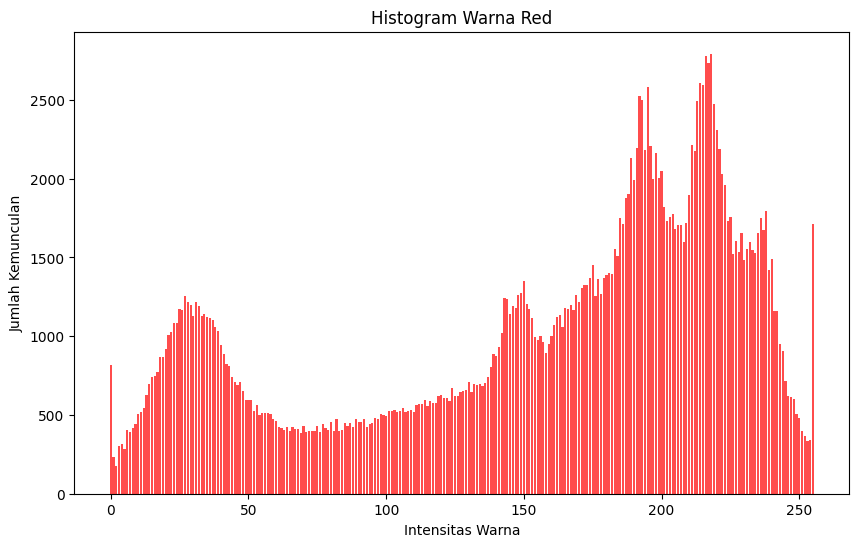

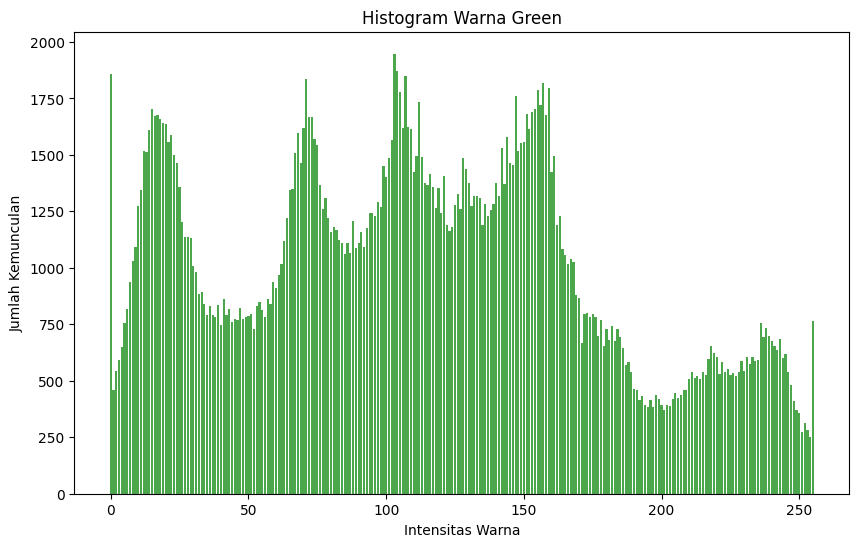

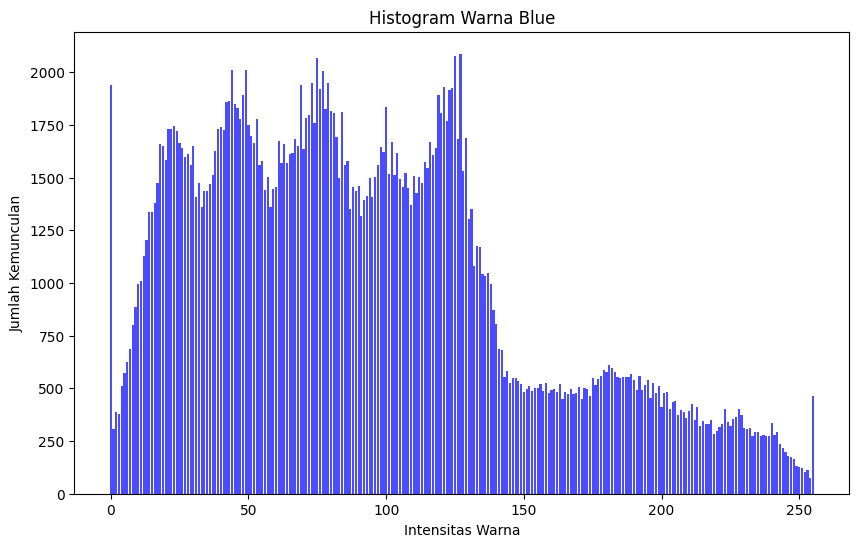

In [35]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

def hitung_pixel(image):
  red = {}
  green = {}
  blue = {}

  # Akses per pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      b = int(image[y, x, 0])
      g = int(image[y, x, 1])
      r = int(image[y, x, 2])

      if r in red:
        red[r] += 1
      else:
        red[r] = 1

      if g in green:
        green[g] += 1
      else:
        green[g] = 1

      if b in blue:
        blue[b] += 1
      else:
        blue[b] = 1

  return red, green, blue

def buat_histogram(intensitas, warna):
  plt.figure(figsize=(10, 6))
  plt.bar(intensitas.keys(), intensitas.values(), color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(img)
buat_histogram(intensitas_merah, 'red')
buat_histogram(intensitas_hijau, 'green')
buat_histogram(intensitas_biru, 'blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

- Penggunaan numpy histogram menampilkan hasil yang sama dengan penggunaan function sebelumnya

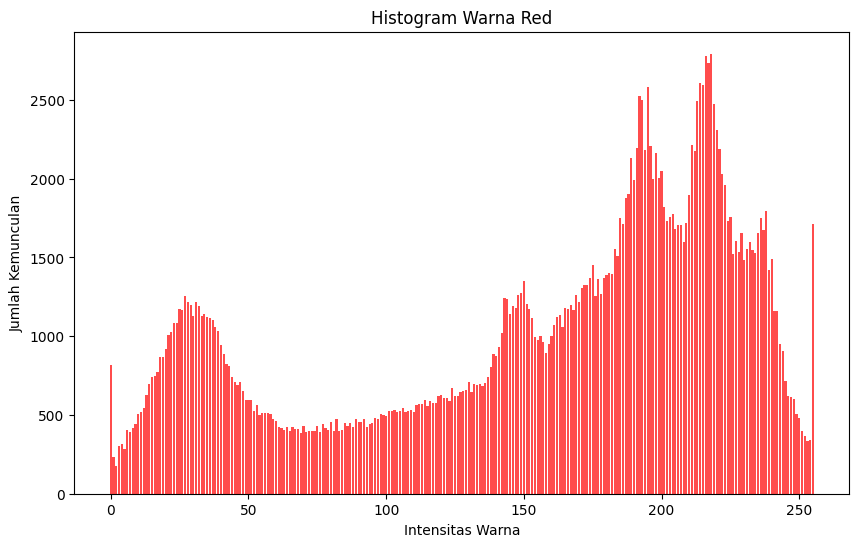

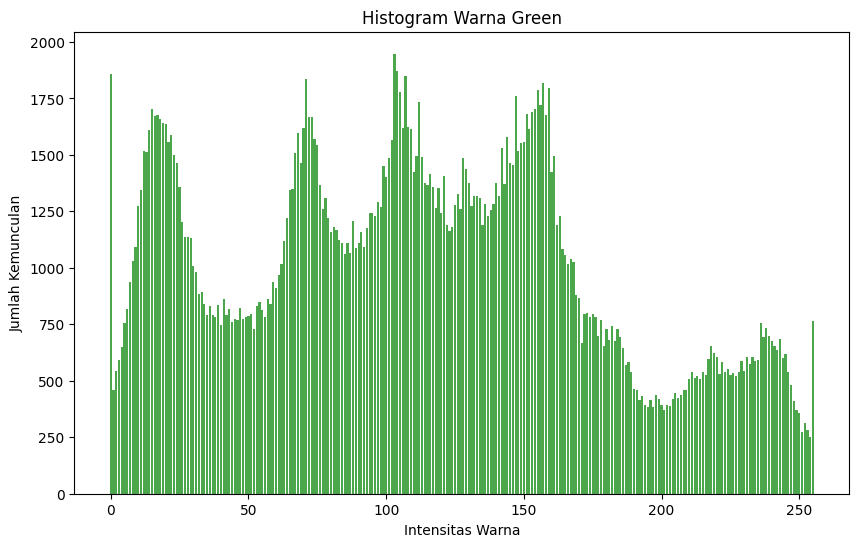

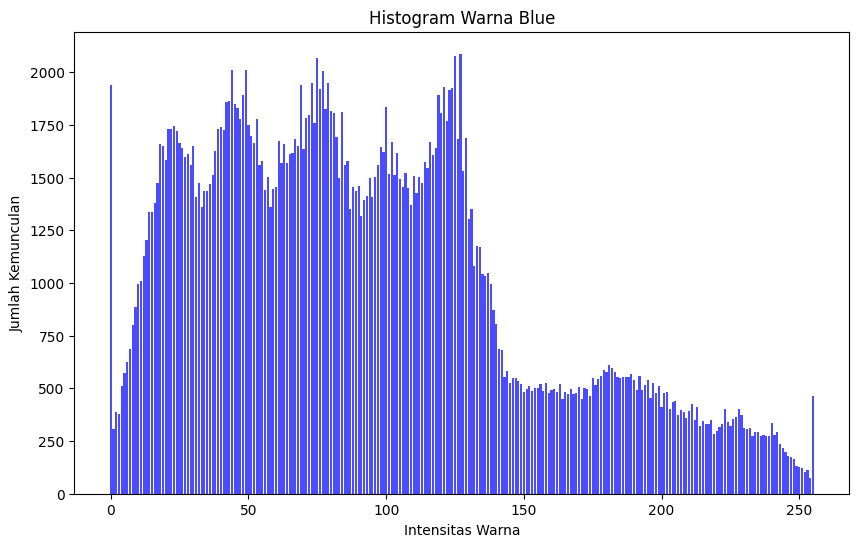

In [36]:
def numpy_histogram(intensitas, warna):
  key = list(intensitas.keys())
  value = list(intensitas.values())

  histogram = np.histogram(key, bins=range(257), weights=value)[0]

  # Menampilkan histogram
  plt.figure(figsize=(10, 6))
  plt.bar(range(256), histogram, color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

numpy_histogram(intensitas_merah, 'red')
numpy_histogram(intensitas_hijau, 'green')
numpy_histogram(intensitas_biru, 'blue')

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

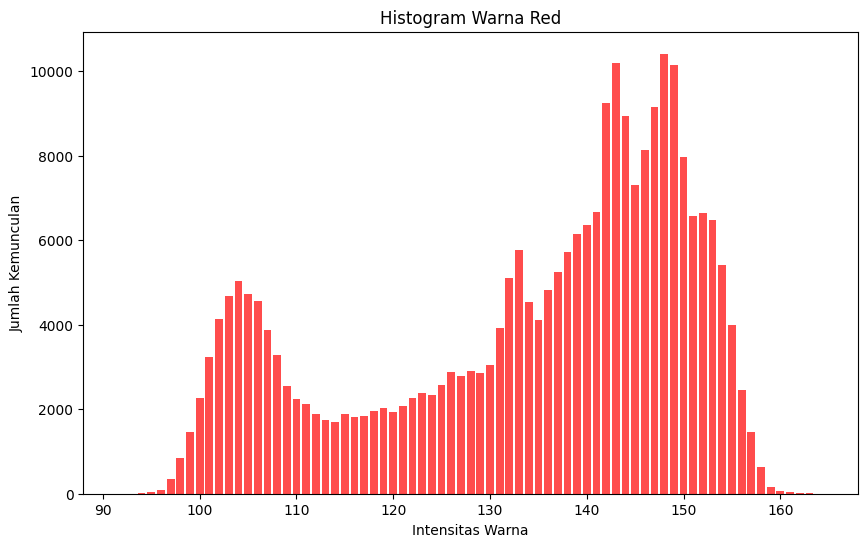

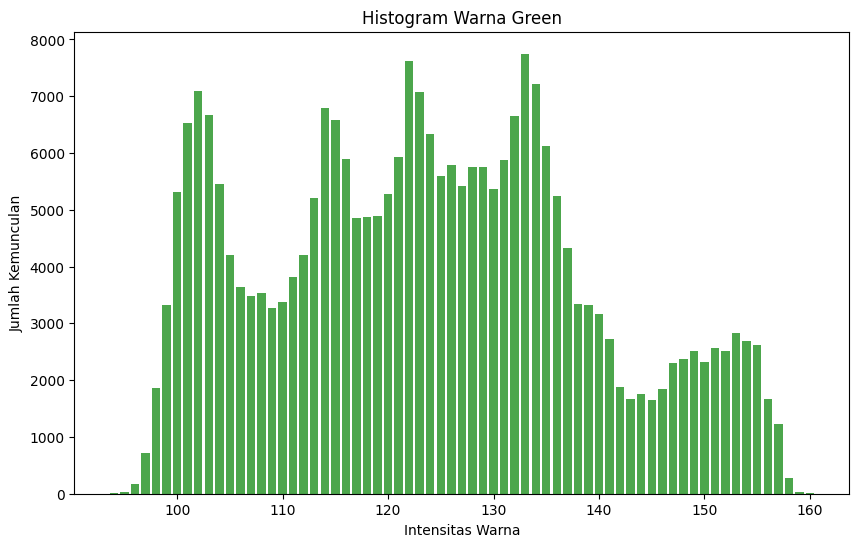

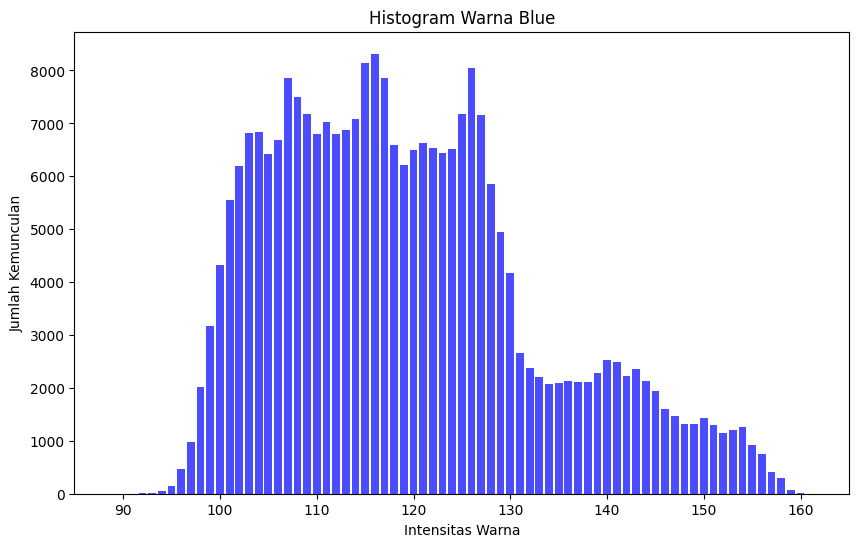

In [37]:
img2 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Sebelum histogram equalization
intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(img2)
buat_histogram(intensitas_merah, 'red')
buat_histogram(intensitas_hijau, 'green')
buat_histogram(intensitas_biru, 'blue')

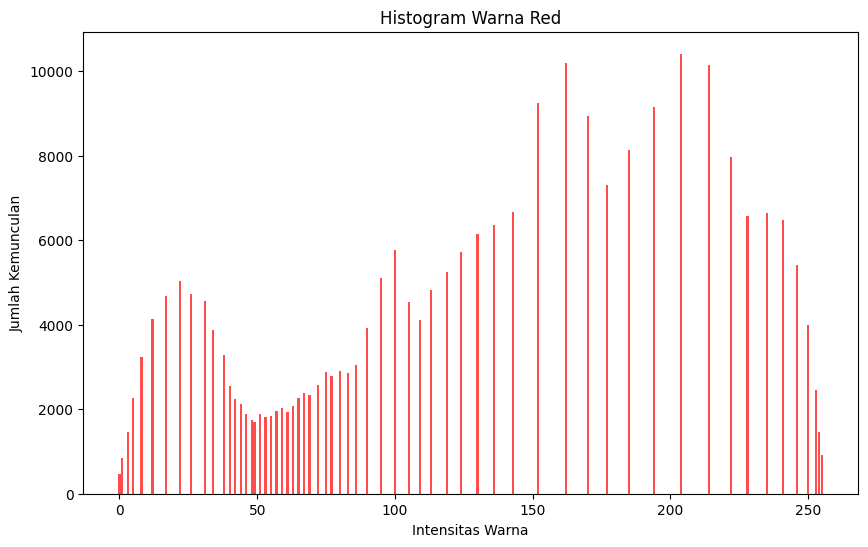

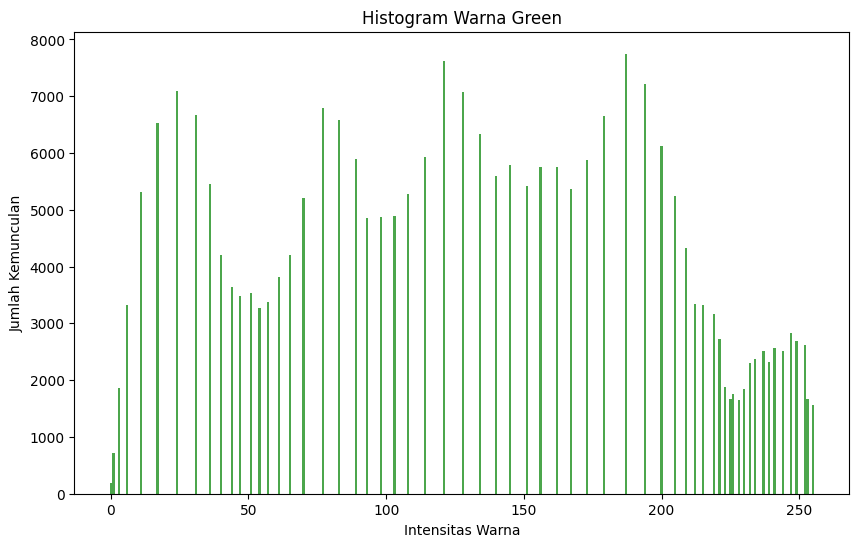

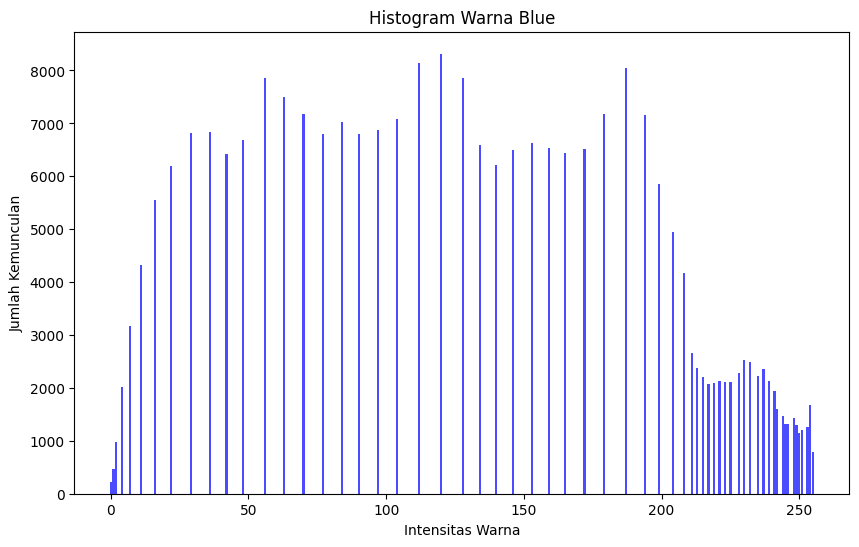

In [38]:
def histogram_equalization(image):

  # Intensitas Pixel
  intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(image)

  red_channel = hitung_sk(image[...,2], intensitas_merah)
  green_channel = hitung_sk(image[...,1], intensitas_hijau)
  blue_channel = hitung_sk(image[...,0], intensitas_biru)

  merged_image = cv.merge([blue_channel, green_channel, red_channel])

  return merged_image

def hitung_sk(image, list_intensitas):
  list_intensitas = dict(sorted(list_intensitas.items()))

  # l, rj dan nrj
  l = 256
  rj = list(list_intensitas.keys())
  nrj = list(list_intensitas.values())

  # K0
  k0 = []
  for i in range(len(rj)):
    if i == 0:
      k0.append(nrj[i])
    else:
      k0.append(nrj[i] + k0[i - 1])

  # Sk = round((L-1)/MAX(k0) * k0)
  sk = []
  list_pixel_baru = {}
  for i in range(len(rj)):
    k0s = (l - 1) / k0[-1] * k0[i]
    sk.append(round(k0s))

    list_pixel_baru[rj[i]] = sk[i]

  # Konversi nilai pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      image[y, x] = list_pixel_baru[image[y, x]]

  return image

img3 = np.copy(img2)
equalized_img = histogram_equalization(img3)

# Sesudah histogram equalization
intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(equalized_img)
buat_histogram(intensitas_merah, 'red')
buat_histogram(intensitas_hijau, 'green')
buat_histogram(intensitas_biru, 'blue')

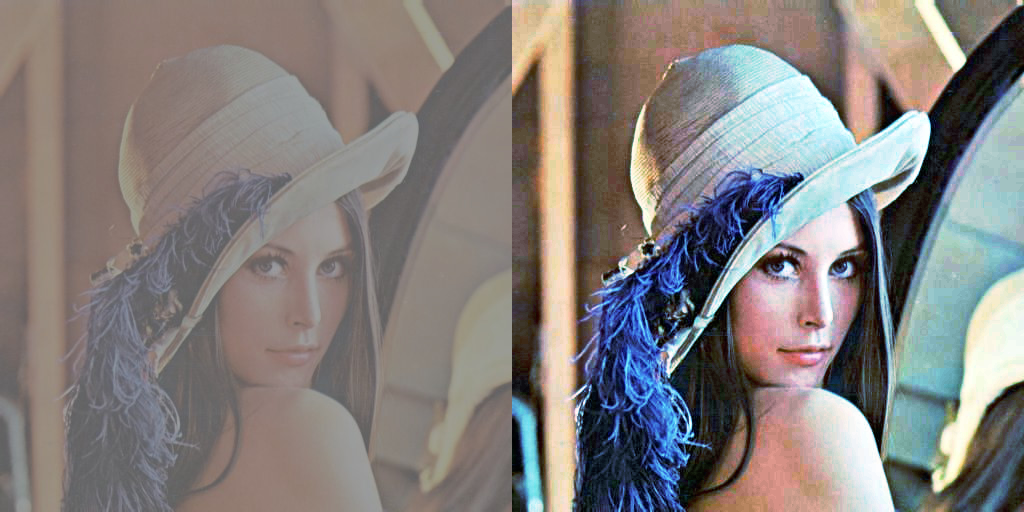

In [39]:
final_frame = cv.hconcat((img2, equalized_img))
cv2_imshow(final_frame)

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

- *EqualizeHist* pada CV2 memberikan hasil yang sama dengan menggunakan function yang dibuat diatas

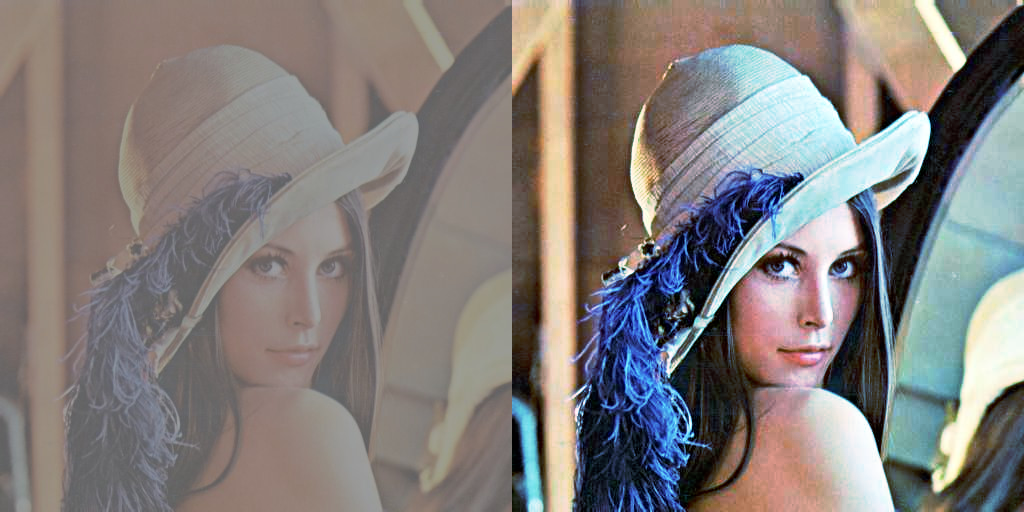

In [40]:
def use_equlizeHist(image):
  # Histogram Equalization setiap channel warna
  b, g, r = cv.split(img)
  b_eq = cv.equalizeHist(b)
  g_eq = cv.equalizeHist(g)
  r_eq = cv.equalizeHist(r)

  # Merge Channel Warna
  img_eq = cv.merge((b_eq, g_eq, r_eq))

  return img_eq

equalized_img = use_equlizeHist(img2)
final_frame = cv.hconcat((img2, equalized_img))
cv2_imshow(final_frame)

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

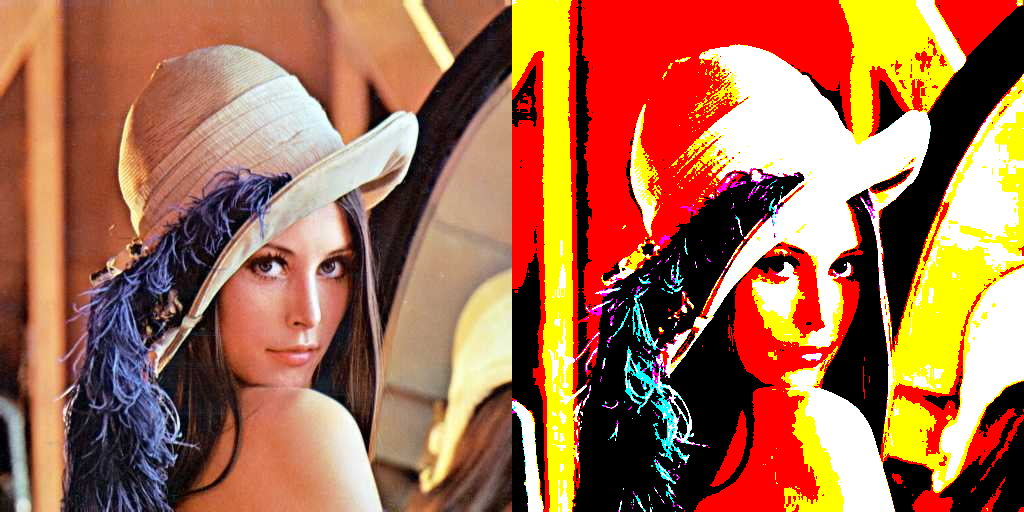

In [41]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

colors = {
    'hitam': (0, 0, 0),
    'hijau': (0, 255, 0),
    'kuning': (255, 255, 0),
    'biru': (0, 0, 255),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'putih': (255, 255, 255)
}

def cari_warna_terdekat(rgb_color):
    min_dist = float('inf')
    nearest_color = None
    for color, target_rgb in colors.items():
        dist = np.linalg.norm(np.array(rgb_color) - np.array(target_rgb))
        # dist = (np.sum((np.array((rgb_color) - np.array(target_rgb)) ** 2)))**0.5 # Eclidean Norm
        if dist < min_dist:
            min_dist = dist
            nearest_color = color
    return nearest_color

def ubah_warna(image):
  new_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel_color = tuple(image[y, x])
        nearest_color = cari_warna_terdekat(pixel_color)
        new_image[y, x] = colors[nearest_color]

  return new_image

new_image = ubah_warna(img)

final_frame = cv.hconcat((img, new_image))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

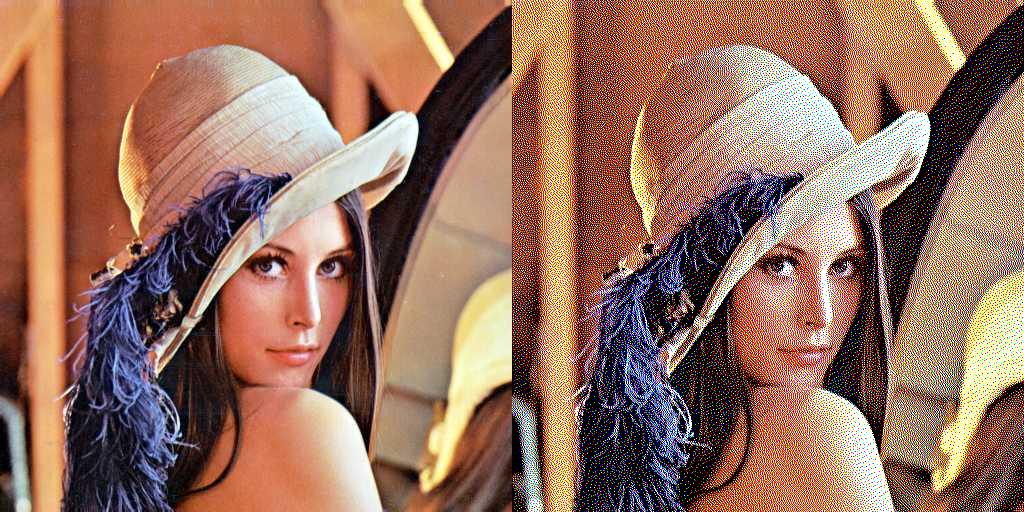

In [42]:
img2 = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

def floyd_steinberg_dithering(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  channel = image.shape[2]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      for c in range(channel):
        # Jarak pixel tetangga
        pixel_old = image[y, x, c]

        # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
        pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

        image[y, x, c] = pixel_new

        error = pixel_old - pixel_new

        # Lakukan untuk semua channel warna
        # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
        if x + 1 < lebar:
          image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7/16)
        if y + 1 < tinggi:
          if x - 1 >= 0:
            image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3/16)
          image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5/16)
          if x + 1 < lebar:
            image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1/16)

  return image

def threshold(nilai_warna):
  if nilai_warna > 255:
    nilai_warna = 255
  elif nilai_warna < 0:
    nilai_warna = 0

  return nilai_warna

img3 = np.copy(img2)

dithering_image = floyd_steinberg_dithering(img3)
final_frame = cv.hconcat((img2, dithering_image))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

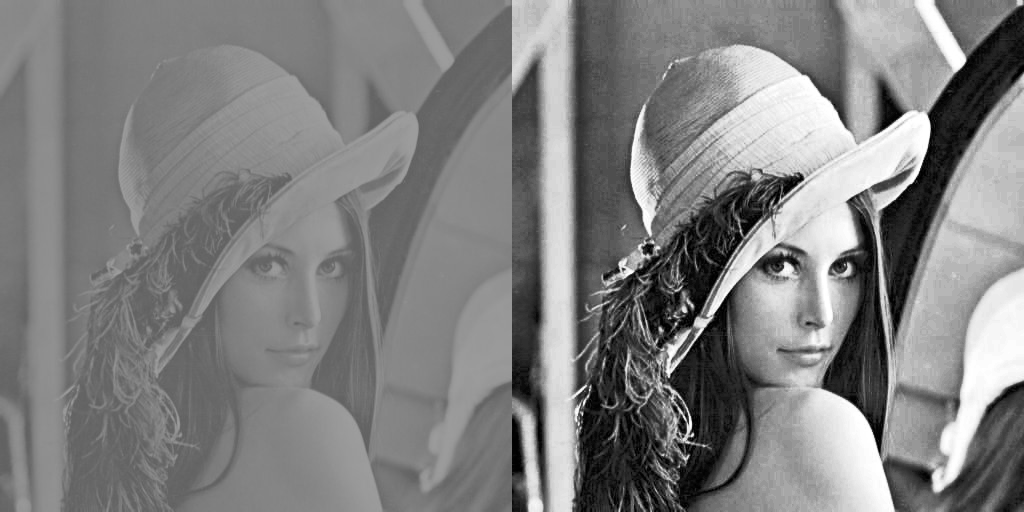

In [47]:
img = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray_1 = np.copy(img_gray)

equalized_img = cv.equalizeHist(img_gray_1)

final_frame = cv.hconcat((img_gray, equalized_img))
cv2_imshow(final_frame)

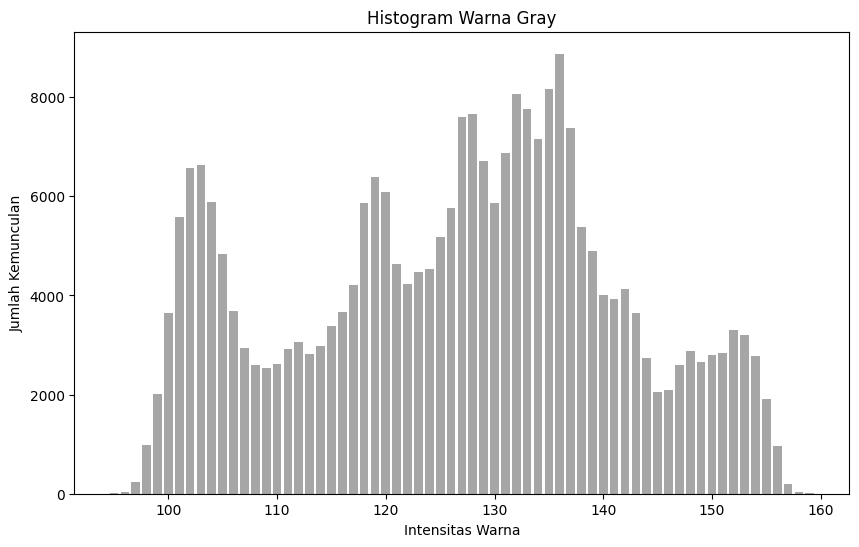

In [48]:
# Sebelum Equalization
intensitas_gray = hitung_pixel_gray(img_gray)
buat_histogram(intensitas_gray, 'gray')

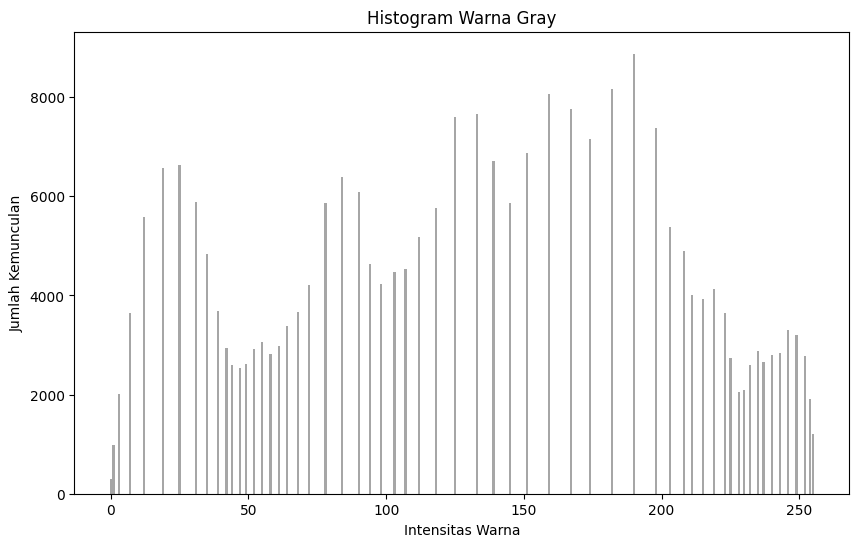

In [49]:
# Setelah Equalization
intensitas_gray = hitung_pixel_gray(equalized_img)
buat_histogram(intensitas_gray, 'gray')

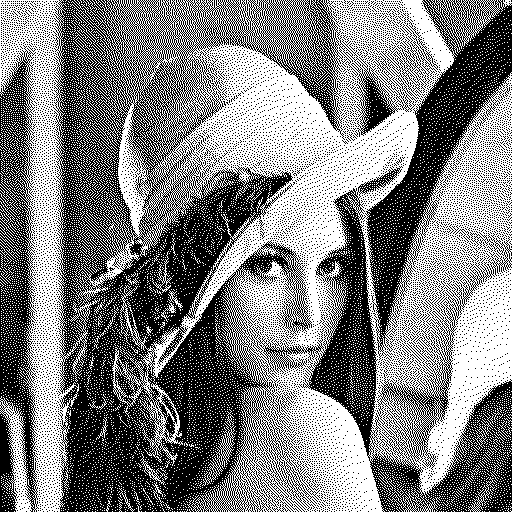

In [50]:
# Floyd-Steinberg Dithering

def floyd_steinberg_dithering_gray(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      # Jarak pixel tetangga
      pixel_old = image[y, x]

      # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
      pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

      image[y, x] = pixel_new

      error = pixel_old - pixel_new

      # Lakukan untuk semua channel warna
      # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
      if x + 1 < lebar:
        image[y, x + 1] = threshold(image[y, x + 1] + error * 7/16)
      if y + 1 < tinggi:
        if x - 1 >= 0:
          image[y + 1, x - 1] = threshold(image[y + 1, x - 1] + error * 3/16)
        image[y + 1, x] = threshold(image[y + 1, x] + error * 5/16)
        if x + 1 < lebar:
          image[y + 1, x + 1] = threshold(image[y + 1, x + 1] + error * 1/16)

  return image

dithering_image = floyd_steinberg_dithering_gray(equalized_img)
cv2_imshow(dithering_image)